In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from os import listdir
from os.path import isfile, join
from tabulate import tabulate
import dataframe_image as dfi


# Make helper functions to extract excel data and plot impedance

In [2]:
def get_files(prefix):
    mypath = os.getcwd() + "/" + prefix
    list_of_files = [prefix + f for f in listdir(mypath) if isfile(join(mypath, f)) and "xls" in f]
    return np.sort(list_of_files)

def make_excel_array(fname, show_data=False):
    pandas = pd.read_excel(fname)
    full_array = np.array(pandas).T
    
    # show contents of excel file
    if show_data:
        print(pandas)
    
    # index 6: frequency (Hz)  
    # index 4: Z(omega) = magnitude of impedance
    # index 5 = phase!
    
    
    return [full_array[6], full_array[4], full_array[5]]

def plot_sample(file_list, electrode_name, color='o', label=""):
    # makes a plot of relevant electrodes e.g. electrode1
    # specify color b, r, c, m, y, b, w
    label_flag = True
    for fname in file_list:
        if electrode_name in fname:
            vals = make_excel_array(fname)
            if(label_flag):
                label_flag = False
                plt.plot(vals[0], vals[1], color, label=label)
                plt.plot(vals[0], vals[2], "x", label=label + " phase")
#                 plt.plot(vals[0], vals[1], color, label=label)
            else:
#                 plt.plot(vals[0], vals[1], color)
                plt.plot(vals[0], vals[1], color)
                plt.plot(vals[0], vals[2], "x")
        
def format_log_plot():
    plt.yscale('log')
    plt.xscale('log')
    
def plot_single_sample(fname,title=""):
    vals = make_excel_array(fname)
    plt.plot(vals[0], vals[1],'o')
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Impedance Z(Ω) [Ohms]")
    plt.title(title)
    plt.show()
    
def plot_electrodes(file_list, color='o', label=""):
    # specify color b, r, c, m, y, b, w
    label_flag = True
    for fname in file_list:
#         if electrode_name in fname:
        vals = make_excel_array(fname)
        if(label_flag):
            label_flag = False
            plt.plot(vals[0], vals[1], color, label=label)
            plt.plot(vals[0], vals[2], "x", label=label + " phase")
#                 plt.plot(vals[0], vals[1], color, label=label)
        else:
#                 plt.plot(vals[0], vals[1], color)
            plt.plot(vals[0], vals[1], color)
            plt.plot(vals[0], vals[2], "x")

# sample files:
# fname = 'electrode1-8mm-left.xlsx'

In [20]:
# fname = "20250511_AJP_Silver/Ch3_50mV_01-100kHz.xlsx"
# pd.read_excel(fname)

In [3]:
global_impedances = []
time_points = [0, 12, 24]

In [4]:
pi_impedances= []

['20250515_AJP_Silver_PI_0hr/Ch1_50mV_01-100kHz.xlsx'
 '20250515_AJP_Silver_PI_0hr/Ch2_50mV_01-100kHz.xlsx'
 '20250515_AJP_Silver_PI_0hr/Ch3_50mV_01-100kHz.xlsx'
 '20250515_AJP_Silver_PI_0hr/Ch4_50mV_01-100kHz.xlsx'
 '20250515_AJP_Silver_PI_0hr/Ch5_50mV_01-100kHz.xlsx'
 '20250515_AJP_Silver_PI_0hr/Ch6_50mV_01-100kHz.xlsx']


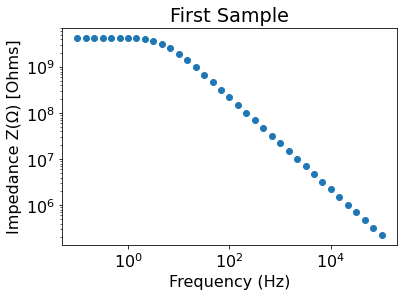

In [108]:
## Probe 1
# prefix = '20250511_AJP_Silver_Probe1/'
# prefix = '20250512-AJP_Silver_Probe1/'

## Probe 2
# prefix = '20250512_AJP_Silver_0hr/'
# prefix = '20250513_AJP_Silver_12hr/'
# prefix = '20250513_AJP_Silver_24hr/'
# prefix = '20250514_AJP_Silver_36hr/'
# prefix = '20250514_AJP_Silver_48hr/'
# prefix = '20250515_AJP_Silver_60hr/'
# prefix = '20250515_AJP_Silver_72hr/'
# prefix = '20250516_AJP_Silver_84hr/'
# prefix = '20250517_AJP_Silver_108hr/'
# prefix = '20250518_AJP_Silver_132hr/'
# prefix = '20250519_AJP_Silver_156hr/'

time_points = [0, 12, 24, 36, 48, 60, 72, 84, 108, 132, 156]
probe2_prefixes = ['20250512_AJP_Silver_0hr/',
                   '20250513_AJP_Silver_12hr/',
                   '20250513_AJP_Silver_24hr/',
                   '20250514_AJP_Silver_36hr/',
                   '20250514_AJP_Silver_48hr/',
                   '20250515_AJP_Silver_60hr/',
                   '20250515_AJP_Silver_72hr/',
                   '20250516_AJP_Silver_84hr/',
                   '20250517_AJP_Silver_108hr/',
                   '20250518_AJP_Silver_132hr/',
                   '20250519_AJP_Silver_156hr/',
                  ]

## Probe 3
# prefix = '20250515_AJP_Silver_PI_0hr/'
# prefix = '20250515_AJP_Silver_PI_12hr/'
# prefix = '20250516_AJP_Silver_PI_24hr/'
# prefix = '20250517_AJP_Silver_PI_48hr/'

probe3_times = [0, 12, 24, 48, 72, 96]
probe3_prefixes = ['20250515_AJP_Silver_PI_0hr/',
                   '20250515_AJP_Silver_PI_12hr/',
                   '20250516_AJP_Silver_PI_24hr/',
                   '20250517_AJP_Silver_PI_48hr/',
                   '20250518_AJP_Silver_PI_72hr/',
                   '20250519_AJP_Silver_PI_96hr/',
                  ]

prefix = probe2_prefixes[0]
# prefix = '20250519_AJP_Silver_156hr/'
prefix = '20250515_AJP_Silver_PI_0hr/'
files =  get_files(prefix)
print(files)
fname = files[0]

# fname = '20250519_AJP_Silver_156hr/'

# fname = gold_files[0]

x, y, z = make_excel_array(fname, show_data=False)
plot_single_sample(fname,title="First Sample")

In [21]:
# Generate Global Silver Impedances

count = 0
time_points = [0, 12, 24, 36, 48, 60, 72, 84, 108, 132, 156]
global_impedances = []

for prefix in probe2_prefixes:
    files =  get_files(prefix)
    
    impedances = []
    
    for i in [5,4,3,2,1,0]:
        vals = make_excel_array(files[i])
        if i == 0: print(files[i])

        khz_index = np.where(vals[0] == 1000)[0][0]
        impedances.append(vals[1][khz_index])

    global_impedances.append(impedances)

print(len(global_impedances))

20250512_AJP_Silver_0hr/Ch1_50mV_01-100kHz.xlsx
20250513_AJP_Silver_12hr/Ch1_50mV_01-100kHz.xlsx
20250513_AJP_Silver_24hr/Ch1_50mV_01-100kHz.xlsx
20250514_AJP_Silver_36hr/Ch1_50mV_01-100kHz.xlsx
20250514_AJP_Silver_48hr/Ch1_50mV_01-100kHz.xlsx
20250515_AJP_Silver_60hr/Ch1_50mV_01-100kHz.xlsx
20250515_AJP_Silver_72hr/Ch1_50mV_01-100kHz.xlsx
20250516_AJP_Silver_84hr/Ch1_50mV_01-100kHz.xlsx
20250517_AJP_Silver_108hr/Ch1_50mV_01-100kHz.xlsx
20250518_AJP_Silver_132hr/Ch1_50mV_01-100kHz.xlsx
20250519_AJP_Silver_156hr/Ch1_50mV_01-100kHz.xlsx
11


In [16]:
# Generate Global PI/Silver Impedances

probe3_times = [0, 12, 24, 48, 72, 96]
pi_impedances= []

for prefix in probe3_prefixes:
    files =  get_files(prefix)
    
    impedances = []
    
    for i in [5,4,3,2,1,0]:
        vals = make_excel_array(files[i])
        if i == 0: print(files[i])

        khz_index = np.where(vals[0] == 1000)[0][0]
        impedances.append(vals[1][khz_index])

    pi_impedances.append(impedances)

print(len(pi_impedances))

20250515_AJP_Silver_PI_0hr/Ch1_50mV_01-100kHz.xlsx
20250515_AJP_Silver_PI_12hr/Ch1_50mV_01-100kHz.xlsx
20250516_AJP_Silver_PI_24hr/Ch1_50mV_01-100kHz.xlsx
20250517_AJP_Silver_PI_48hr/Ch1_50mV_01-100kHz.xlsx
20250518_AJP_Silver_PI_72hr/Ch1_50mV_01-100kHz.xlsx
20250519_AJP_Silver_PI_96hr/Ch1_50mV_01-100kHz.xlsx
6


## Figure for Silver Data

20250515_AJP_Silver_PI_0hr/Ch6_50mV_01-100kHz.xlsx
20250515_AJP_Silver_PI_0hr/Ch5_50mV_01-100kHz.xlsx
20250515_AJP_Silver_PI_0hr/Ch4_50mV_01-100kHz.xlsx
20250515_AJP_Silver_PI_0hr/Ch3_50mV_01-100kHz.xlsx
20250515_AJP_Silver_PI_0hr/Ch2_50mV_01-100kHz.xlsx
20250515_AJP_Silver_PI_0hr/Ch1_50mV_01-100kHz.xlsx


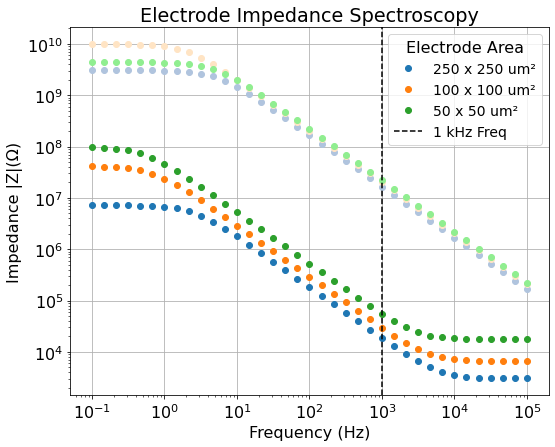

Electrode 1khz Impedances [18551.8694810716, 16607042.0407632, 29728.9120974045, 20510761.7056762, 55469.2313633059, 22048144.8576588]


In [109]:
# colors = ["tab:blue", "lightsteelblue", "tab:orange", "bisque", "tab:green", "lightgreen"]
count = 0
impedances = []
labels = ["250 x 250 um²", "", "100 x 100 um²", "", "50 x 50 um²", ""]
colors = ["tab:blue", "lightsteelblue", "tab:orange", "bisque", "tab:green", "lightgreen"]


plt.figure(figsize=(8,6.5))
plt.rc('font', size=16) # set the font size globally

for i in [5,4,3,2,1,0]:
    vals = make_excel_array(files[i])
    print(files[i])
    # plt.plot(vals[0], vals[1],'o', color=colors[count], label="Electrode"+str(count+1))
    plt.plot(vals[0], vals[1],'o', color=colors[count], label=labels[count])
    count+=1
    
    khz_index = np.where(vals[0] == 1000)[0][0]
    impedances.append(vals[1][khz_index])

# global_impedances.append(impedances)

plt.axvline(x = 1000, color="k", linestyle='dashed', label="1 kHz Freq")
    
plt.yscale('log')
plt.xscale('log')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Impedance |Z|(Ω)")
plt.title("Electrode Impedance Spectroscopy")
# plt.title("Silver AJP Electrodes in Saline")
plt.grid()
# plt.ylim([500, 100000000])
plt.legend(title="Electrode Area", ncol=1, loc="upper right", fontsize=14)
plt.tight_layout()
# plt.savefig("insulated-vs-exposed-eis.png", dpi=600)
plt.show()

print("Electrode 1khz Impedances", impedances)

In [111]:
print(min(impedances))

print(max(impedances))

print(impedances)

18551.8694810716
22048144.8576588
[18551.8694810716, 16607042.0407632, 29728.9120974045, 20510761.7056762, 55469.2313633059, 22048144.8576588]


findfont: Font family ['sanserif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sanserif'] not found. Falling back to DejaVu Sans.


20250519_AJP_Silver_156hr/Ch6_50mV_01-100kHz.xlsx
20250519_AJP_Silver_156hr/Ch4_50mV_01-100kHz.xlsx
20250519_AJP_Silver_156hr/Ch2_50mV_01-100kHz.xlsx


findfont: Font family ['sanserif'] not found. Falling back to DejaVu Sans.


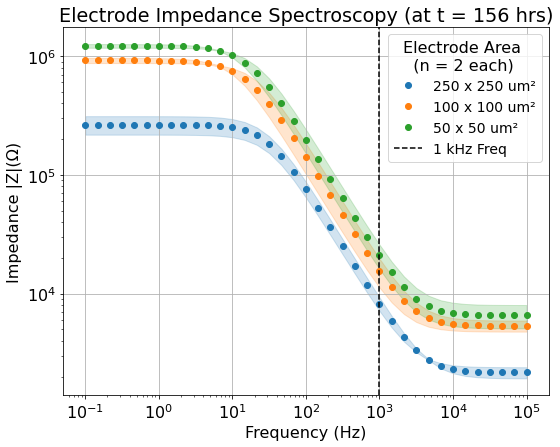

Electrode 1khz Impedances [7157.28268818347, 9299.30097734581, 19719.3972181578, 11261.7808604978, 16120.5698737994, 25893.5238135965]


In [107]:
plt.figure(figsize=(8,6.5))
plt.rc('font', size=16) # set the font size globally
plt.rcParams["font.family"] = "sanserif"
colors = ["tab:blue", "tab:orange", "tab:green"]
labels = ["250 x 250 um²","100 x 100 um²", "50 x 50 um²"]
impedances = []

count = 0
for i in [5,3,1]:
    vals1 = make_excel_array(files[i])
    vals2 = make_excel_array(files[i - 1])
    print(files[i])
    data = np.mean(np.array([vals1[1], vals2[1]]),axis=0)
    stds = np.std(np.array([vals1[1], vals2[1]]),axis=0)
    # plt.plot(vals[0], vals[1],'o', color=colors[count], label="Electrode"+str(count+1))
    plt.plot(vals1[0], data,'o', color=colors[count], label=labels[count])
    plt.fill_between(vals1[0], data - stds, data + stds, color=colors[count], alpha=0.2)
    count+=1
    
    khz_index = np.where(vals[0] == 1000)[0][0]
    impedances.append(vals1[1][khz_index])
    impedances.append(vals2[1][khz_index])
    

plt.axvline(x = 1000, color="k", linestyle='dashed', label="1 kHz Freq")
    
plt.yscale('log')
plt.xscale('log')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Impedance |Z|(Ω)")
plt.title("Electrode Impedance Spectroscopy (at t = 156 hrs)")
# plt.title("Silver AJP Electrodes in Saline (t = 156 hr)")
# plt.title("Silver AJP Electrodes in Saline")
plt.grid()
# plt.ylim([500, 100000000])
plt.legend(title="Electrode Area \n  (n = 2 each)", ncol=1, loc="upper right", fontsize=14)
plt.tight_layout()
# plt.savefig("shaded-silver-ajp-156hr.png", dpi=600)
plt.show()

print("Electrode 1khz Impedances", impedances)


# plt.plot(t, join_phases_mean, ".-", color='purple', label='Mean', markersize=10)

# Shade the standard deviation area
# plt.fill_between(t, join_phases_mean - join_phases_std, join_phases_mean + join_phases_std, color='purple', alpha=0.2, label='Standard Deviation')


In [106]:
print(min(impedances))

print(max(impedances))

7157.28268818347
25893.5238135965


20250519_AJP_Silver_156hr/Ch6_50mV_01-100kHz.xlsx
20250519_AJP_Silver_156hr/Ch4_50mV_01-100kHz.xlsx
20250519_AJP_Silver_156hr/Ch2_50mV_01-100kHz.xlsx


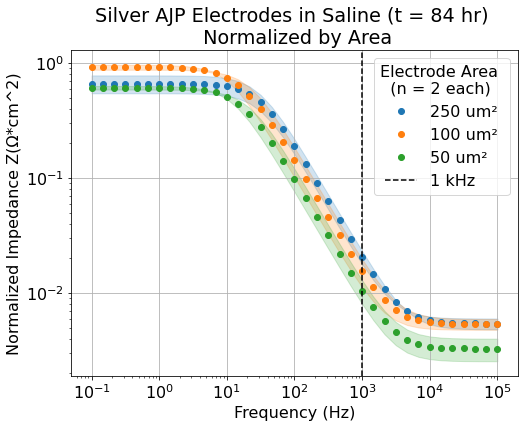

Electrode 1khz Impedances [0.0205707295819116, 0.015490589039327799, 0.010503523421848975]
mean =  0.015521614014362792
std =  0.004109978254533526


In [24]:
## PLOT NORMALIZED

area = [2.5E-6, 1.0E-6, 0.5E-6]


plt.figure(figsize=(8,6))
plt.rc('font', size=16) # set the font size globally
colors = ["tab:blue", "tab:orange", "tab:green"]
labels = ["250 um²","100 um²", "50 um²"]
impedances = []
count = 0
for i in [5,3,1]:
    vals1 = make_excel_array(files[i])
    vals2 = make_excel_array(files[i - 1])
    print(files[i])
    data = np.mean(np.array([vals1[1], vals2[1]]),axis=0)*area[count]
    stds = np.std(np.array([vals1[1], vals2[1]]),axis=0)*area[count]
    # plt.plot(vals[0], vals[1],'o', color=colors[count], label="Electrode"+str(count+1))
    plt.plot(vals1[0], data,'o', color=colors[count], label=labels[count])
    plt.fill_between(vals1[0], data - stds, data + stds, color=colors[count], alpha=0.2)
    
    khz_index = np.where(vals[0] == 1000)[0][0]
    impedances.append(data[khz_index])
    
    count+=1

plt.axvline(x = 1000, color="k", linestyle='dashed', label="1 kHz")
    
plt.yscale('log')
plt.xscale('log')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Normalized Impedance Z(Ω*cm^2)")
plt.title("Silver AJP Electrodes in Saline (t = 84 hr) \n Normalized by Area")
# plt.title("Silver AJP Electrodes in Saline")
plt.grid()
# plt.ylim([500, 100000000])
plt.legend(title="Electrode Area \n  (n = 2 each)", ncol=1)

# plt.savefig("normalized-silver-ajp-84hr.png", dpi=600)
plt.show()

print("Electrode 1khz Impedances", impedances)

print("mean = ", np.mean(impedances))
print("std = ", np.std(impedances))

# plt.plot(t, join_phases_mean, ".-", color='purple', label='Mean', markersize=10)

# Shade the standard deviation area
# plt.fill_between(t, join_phases_mean - join_phases_std, join_phases_mean + join_phases_std, color='purple', alpha=0.2, label='Standard Deviation')


20250519_AJP_Silver_156hr/Ch6_50mV_01-100kHz.xlsx
20250519_AJP_Silver_156hr/Ch4_50mV_01-100kHz.xlsx
20250519_AJP_Silver_156hr/Ch2_50mV_01-100kHz.xlsx
20250519_AJP_Silver_156hr/Ch5_50mV_01-100kHz.xlsx
20250519_AJP_Silver_156hr/Ch3_50mV_01-100kHz.xlsx
20250519_AJP_Silver_156hr/Ch1_50mV_01-100kHz.xlsx


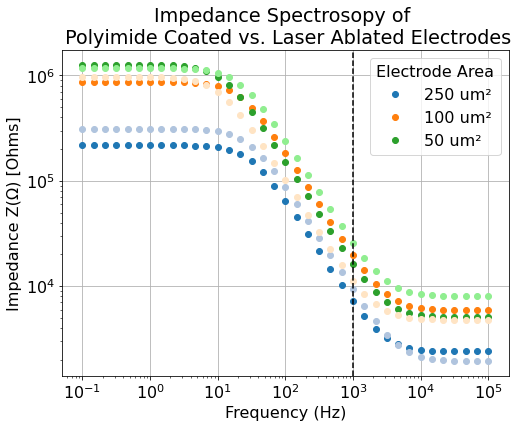

Electrode 1khz Impedances [7157.28268818347, 19719.3972181578, 16120.5698737994, 9299.30097734581, 11261.7808604978, 25893.5238135965]


In [25]:
## Figure for Comparing electrodes vs. insulation

colors = ["tab:blue", "lightsteelblue", "tab:orange", "bisque", "tab:green", "lightgreen"]

impedances = []

plt.figure(figsize=(8,6))
plt.rc('font', size=16) # set the font size globally


# Exposed Electrodes
count = 0
labels = ["250 um²", "100 um²", "50 um²"]
colors = ["tab:blue", "tab:orange", "tab:green"]
for i in [5,3,1]:
    vals = make_excel_array(files[i])
    print(files[i])
    plt.plot(vals[0], vals[1],'o', color=colors[count], label=labels[count])
    count+=1
    
    khz_index = np.where(vals[0] == 1000)[0][0]
    impedances.append(vals[1][khz_index])
    
    
    
# Insulated Electrodes
labels = ["250 um (PI Insulation)", "100 um (PI Insulation)", "50 um (PI Insulation)"]
colors = ["lightsteelblue", "bisque", "lightgreen"]
count = 0

for i in [4,2,0]:
    vals = make_excel_array(files[i])
    print(files[i])
    # plt.plot(vals[0], vals[1],'o', color=colors[count], label=labels[count])
    plt.plot(vals[0], vals[1],'o', color=colors[count])
    count+=1
    
    khz_index = np.where(vals[0] == 1000)[0][0]
    impedances.append(vals[1][khz_index])

pi_impedances.append(impedances)

plt.axvline(x = 1000, color="k", linestyle='dashed')
    
plt.yscale('log')
plt.xscale('log')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Impedance Z(Ω) [Ohms]")
plt.title("Impedance Spectrosopy of \n Polyimide Coated vs. Laser Ablated Electrodes")
plt.grid()
# plt.ylim([500, 100000000000000])
plt.legend(title="Electrode Area")
# plt.legend(title="Electrode Size", ncol=2)
# plt.savefig("exposed-vs-insulated-electrode.png", dpi=600)
plt.show()

print("Electrode 1khz Impedances", impedances)

In [26]:
data = {'Electrode Size [um]': [250, 100, 50],
        'Exposed Electrode \n 1kHz Impedance [kOhms]': np.round([impedances[0]/1000, impedances[1]/1000, impedances[2]/1000], decimals = 2),
        'Insulated Electrode \n 1kHz Impedance [MOhms]': np.round([impedances[3]/1000000, impedances[4]/1000000, impedances[5]/1000000], decimals = 2)
       }
df = pd.DataFrame(data)

print(tabulate(df, headers='keys', tablefmt='psql',showindex=False))

+-----------------------+---------------------------+---------------------------+
|   Electrode Size [um] |        Exposed Electrode  |      Insulated Electrode  |
|                       |    1kHz Impedance [kOhms] |    1kHz Impedance [MOhms] |
|-----------------------+---------------------------+---------------------------|
|                   250 |                      7.16 |                      0.01 |
|                   100 |                     19.72 |                      0.01 |
|                    50 |                     16.12 |                      0.03 |
+-----------------------+---------------------------+---------------------------+


In [378]:
print("Open electrodes")

print("mean = ", np.mean(pi_impedances[0][0:3])/1000)

print("std = ", np.std(pi_impedances[0][0:3])/1000)

print("Insulated electrodes")

print("mean = ", np.mean(pi_impedances[0][3:])/1000000)

print("std = ", np.std(pi_impedances[0][3:])/1000000)

Open electrodes
mean =  34.58333764726067
std =  15.457403569169992
Insulated electrodes
mean =  19.721982868032736
std =  2.2902734926994994


In [360]:

data = {'Electrode': [1,2,3,4,5,6],
        'Size [um]': [250, 100, 50, 250, 100, 50],
        '1kHz Impedance [Ohms] \n at t = 0 hr': pi_impedances[0],
       't = 12 hr': pi_impedances[1],
       't = 24 hr': pi_impedances[2]}
df = pd.DataFrame(data)

print(tabulate(df, headers='keys', tablefmt='psql',showindex=False))

+-------------+-------------+--------------------------+-----------------+-----------------+
|   Electrode |   Size [um] |   1kHz Impedance [Ohms]  |       t = 12 hr |       t = 24 hr |
|             |             |              at t = 0 hr |                 |                 |
|-------------+-------------+--------------------------+-----------------+-----------------|
|           1 |         250 |          18551.9         |  8498.95        |  8459.98        |
|           2 |         100 |          29728.9         | 41067.4         | 34664.4         |
|           3 |          50 |          55469.2         | 68866.9         | 54724.8         |
|           4 |         250 |              1.6607e+07  |     1.38876e+07 |     1.69457e+07 |
|           5 |         100 |              2.05108e+07 |     1.46614e+07 |     1.72965e+07 |
|           6 |          50 |              2.20481e+07 |     1.60759e+07 |     1.8636e+07  |
+-------------+-------------+--------------------------+--------------

In [518]:
len(global_impedances)

9

In [27]:
# ## Plotting individual 

# colors_all = ["lightsteelblue",  "bisque",  "lightgreen"]
# labels = ["250 um", "100 um", "50 um"]

# t = 0

# for t in range(len(time_points)):
#     plt.plot(time_points[t],global_impedances[t][0], "o", color="lightsteelblue")
#     plt.plot(time_points[t],global_impedances[t][1], "o", color="lightsteelblue")

#     plt.plot(time_points[t],global_impedances[t][2], "o", color="bisque")
#     plt.plot(time_points[t],global_impedances[t][3], "o", color="bisque")

#     plt.plot(time_points[t],global_impedances[t][4], "o", color="lightgreen")
#     plt.plot(time_points[t],global_impedances[t][5], "o", color="lightgreen")


In [28]:
global_impedances

def average_std_pairs(array):
    assert(len(array) % 2 == 0)
    # requires an even # of items
    averages = []
    stds = []
    
    for i in range(len(array)//2):
        averages.append(np.mean(array[i*2:i*2+2]))
        stds.append(np.std(array[i*2:i*2+2]))
        
    assert(len(averages) == len(array)/2)
    
    return averages, stds

# print(global_impedances[0])
# average_std_pairs(global_impedances[0])

avg_global_impedances = []
for timepoint in range(len(time_points)):
    avg_global_impedances.append(average_std_pairs(global_impedances[timepoint]))
    
print(avg_global_impedances)

[([27646.935695622502, 74836.7662860689, 227758.070770244], [6287.982036339701, 13072.822424211903, 87673.80418817]), ([8113.8202818176205, 22149.7491244493, 28257.3928704801], [1049.4426939078103, 6380.9002976642, 8043.1833505303]), ([9076.53033328248, 18988.7711884139, 25102.65259578115], [335.6484964411502, 4575.200758678, 6393.254851033849]), ([7407.39464603919, 16819.0437506174, 22421.8205294698], [75.1125529555602, 3317.166966977, 6023.838103573498]), ([7006.11735085259, 17008.26356105655, 21601.6550786597], [61.884875825769996, 3880.5544736832508, 5617.053030386901]), ([7592.54326508025, 15489.16536455445, 19343.269762012802], [322.9918893689696, 2585.88707991325, 4782.2468657457]), ([10735.099425806431, 21664.18779521395, 24757.17389150605], [860.08182183187, 4235.23040593135, 6273.31650982425]), ([11435.88005945525, 22663.006381968, 25628.589252298498], [1186.4310524981502, 5209.0890016884005, 7345.075686721499]), ([10179.136458066976, 23953.05899681005, 28314.1191043303], [32

In [240]:
len(avg_global_impedances)

4

In [29]:
electrode_sizes = [250, 100, 50]

data_by_electrode_size = []
for i in range(len(electrode_sizes)):
    single_electrode_size = []
    for t in range(len(time_points)):
        single_electrode_size.append(avg_global_impedances[t][0][i])
    data_by_electrode_size.append(single_electrode_size)

std_by_electrode_size = []
for i in range(len(electrode_sizes)):
    single_electrode_size = []
    for t in range(len(time_points)):
        single_electrode_size.append(avg_global_impedances[t][1][i])
    std_by_electrode_size.append(single_electrode_size)
    
data_by_electrode_size
std_by_electrode_size

[[6287.982036339701,
  1049.4426939078103,
  335.6484964411502,
  75.1125529555602,
  61.884875825769996,
  322.9918893689696,
  860.08182183187,
  1186.4310524981502,
  324.93134678442493,
  1007.21910825751,
  1071.0091445811704],
 [13072.822424211903,
  6380.9002976642,
  4575.200758678,
  3317.166966977,
  3880.5544736832508,
  2585.88707991325,
  4235.23040593135,
  5209.0890016884005,
  7345.399062106051,
  4676.030844591649,
  4228.80817883],
 [87673.80418817,
  8043.1833505303,
  6393.254851033849,
  6023.838103573498,
  5617.053030386901,
  4782.2468657457,
  6273.31650982425,
  7345.075686721499,
  15013.274537713402,
  3800.6412680678495,
  4886.47696989855]]

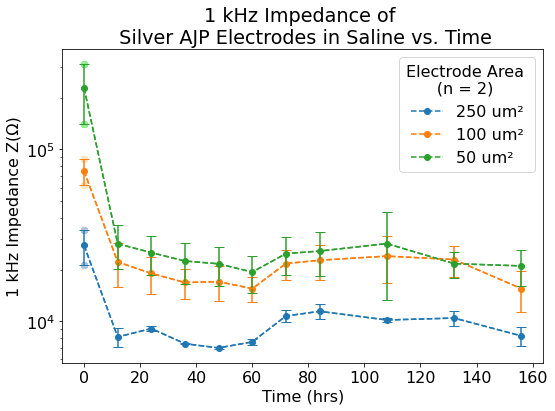

In [30]:
colors_avg = ["tab:blue",  "tab:orange",  "tab:green"]
labels = ["250 um²", "100 um²", "50 um²"]

plt.figure(figsize=(8,6))

t = 0

for time_idx in range(len(time_points)):
    plt.plot(time_points[t],global_impedances[t][0], "o", color="lightsteelblue")
    plt.plot(time_points[t],global_impedances[t][1], "o", color="lightsteelblue")

    plt.plot(time_points[t],global_impedances[t][2], "o", color="bisque")
    plt.plot(time_points[t],global_impedances[t][3], "o", color="bisque")

    plt.plot(time_points[t],global_impedances[t][4], "o", color="lightgreen")
    plt.plot(time_points[t],global_impedances[t][5], "o", color="lightgreen")

for i in range(3):
    # number of electrode sizes
    electrode_size = i
    color = colors_avg[i]
    plt.errorbar(time_points, data_by_electrode_size[electrode_size], yerr=std_by_electrode_size[electrode_size] ,fmt="--", color=color, capsize=5)
    plt.plot(time_points, data_by_electrode_size[electrode_size], "o--", color=color, label=labels[i])

plt.legend(title="Electrode Area \n      (n = 2)")
plt.xlabel("Time (hrs)")
plt.ylabel("1 kHz Impedance Z(Ω)")
plt.yscale('log')
plt.title("1 kHz Impedance of \n Silver AJP Electrodes in Saline vs. Time")
# plt.grid()
plt.tight_layout()

# plt.savefig("silver-ajp-electrode-soak-202505-day.png", dpi=600)

plt.show()

In [500]:
np.array(data_by_electrode_size[electrode_size])*area[0]

array([0.06911734, 0.02028455, 0.02269133, 0.01851849, 0.01751529,
       0.01898136, 0.02683775, 0.0285897 , 0.02544784])

In [512]:
area[2]

5e-07

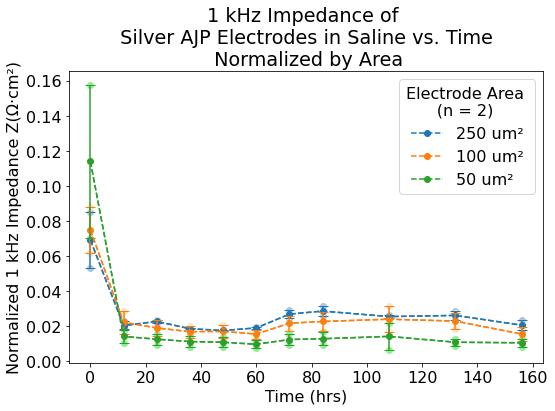

In [57]:
colors_avg = ["tab:blue",  "tab:orange",  "tab:green"]
labels = ["250 um²", "100 um²", "50 um²"]
area = [2.5E-6, 1.0E-6, 0.5E-6]

plt.figure(figsize=(8,6))

t = 0

for t in range(len(time_points)):
    plt.plot(time_points[t],global_impedances[t][0]*area[0], "o", color="lightsteelblue")
    plt.plot(time_points[t],global_impedances[t][1]*area[0], "o", color="lightsteelblue")

    plt.plot(time_points[t],global_impedances[t][2]*area[1], "o", color="bisque")
    plt.plot(time_points[t],global_impedances[t][3]*area[1], "o", color="bisque")

    plt.plot(time_points[t],global_impedances[t][4]*area[2], "o", color="lightgreen")
    plt.plot(time_points[t],global_impedances[t][5]*area[2], "o", color="lightgreen")

for i in range(3):
    # number of electrode sizes
    electrode_size = i
    color = colors_avg[i]
    plt.errorbar(time_points, np.array(data_by_electrode_size[electrode_size])*area[i], yerr=np.array(std_by_electrode_size[electrode_size])*area[i] ,fmt="--", color=color, capsize=5)
    plt.plot(time_points, np.array(data_by_electrode_size[electrode_size])*area[i], "o--", color=color, label=labels[i])

plt.legend(title="Electrode Area \n      (n = 2)")
plt.xlabel("Time (hrs)")
plt.ylabel("Normalized 1 kHz Impedance Z(Ω·cm²)")
# plt.yscale('log')
plt.title("1 kHz Impedance of \n Silver AJP Electrodes in Saline vs. Time \n Normalized by Area")
# plt.grid()
# plt.xlim([14,120])
# plt.ylim([0, 0.05])
plt.tight_layout()

# plt.savefig("silver-ajp-electrode-soak-202505-normalized-area.png", dpi=600)

plt.show()

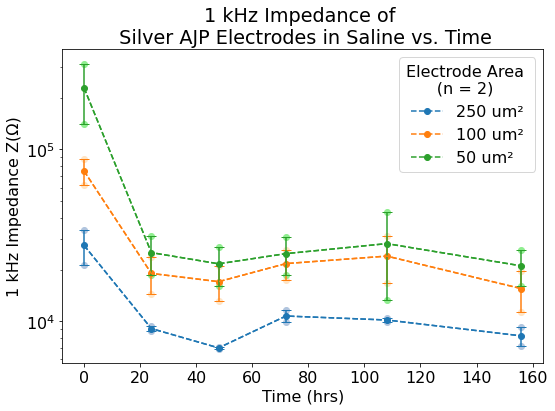

In [32]:
colors_avg = ["tab:blue",  "tab:orange",  "tab:green"]
labels = ["250 um²", "100 um²", "50 um²"]

plt.figure(figsize=(8,6))

t = 0

for time_idx in range(len(time_points[::2])):
    t = time_idx*2
    plt.plot(time_points[t],global_impedances[t][0], "o", color="lightsteelblue")
    plt.plot(time_points[t],global_impedances[t][1], "o", color="lightsteelblue")

    plt.plot(time_points[t],global_impedances[t][2], "o", color="bisque")
    plt.plot(time_points[t],global_impedances[t][3], "o", color="bisque")

    plt.plot(time_points[t],global_impedances[t][4], "o", color="lightgreen")
    plt.plot(time_points[t],global_impedances[t][5], "o", color="lightgreen")

for i in range(3):
    # number of electrode sizes
    electrode_size = i
    color = colors_avg[i]
    plt.errorbar(time_points[::2], data_by_electrode_size[electrode_size][::2], yerr=std_by_electrode_size[electrode_size][::2] ,fmt="--", color=color, capsize=5)
    plt.plot(time_points[::2], data_by_electrode_size[electrode_size][::2], "o--", color=color, label=labels[i])

plt.legend(title="Electrode Area \n      (n = 2)")
plt.xlabel("Time (hrs)")
plt.ylabel("1 kHz Impedance Z(Ω)")
plt.yscale('log')
plt.title("1 kHz Impedance of \n Silver AJP Electrodes in Saline vs. Time")
# plt.grid()
plt.tight_layout()

# plt.savefig("silver-ajp-electrode-soak-202505-1x-day.png", dpi=600)

plt.show()

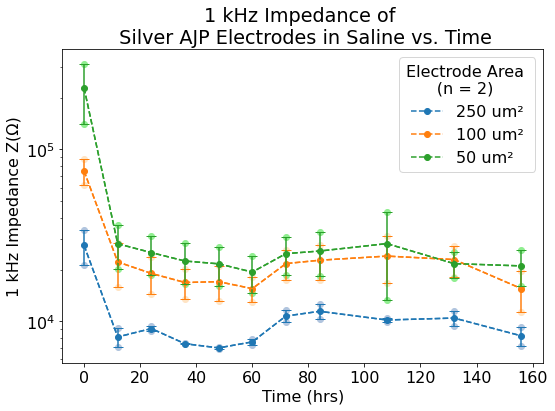

In [58]:
colors_avg = ["tab:blue",  "tab:orange",  "tab:green"]
labels = ["250 um²", "100 um²", "50 um²"]

plt.figure(figsize=(8,6))

t = 0

for t in range(len(time_points)):
    plt.plot(time_points[t],global_impedances[t][0], "o", color="lightsteelblue")
    plt.plot(time_points[t],global_impedances[t][1], "o", color="lightsteelblue")

    plt.plot(time_points[t],global_impedances[t][2], "o", color="bisque")
    plt.plot(time_points[t],global_impedances[t][3], "o", color="bisque")

    plt.plot(time_points[t],global_impedances[t][4], "o", color="lightgreen")
    plt.plot(time_points[t],global_impedances[t][5], "o", color="lightgreen")

for i in range(3):
    # number of electrode sizes
    electrode_size = i
    color = colors_avg[i]
    plt.errorbar(time_points, data_by_electrode_size[electrode_size], yerr=std_by_electrode_size[electrode_size] ,fmt="--", color=color, capsize=5)
    plt.plot(time_points, data_by_electrode_size[electrode_size], "o--", color=color, label=labels[i])

plt.legend(title="Electrode Area \n      (n = 2)")
plt.xlabel("Time (hrs)")
plt.ylabel("1 kHz Impedance Z(Ω)")
plt.yscale('log')
plt.title("1 kHz Impedance of \n Silver AJP Electrodes in Saline vs. Time")
# plt.grid()
plt.tight_layout()

# plt.savefig("silver-ajp-electrode-soak-202505-1x-day.png", dpi=600)

plt.show()

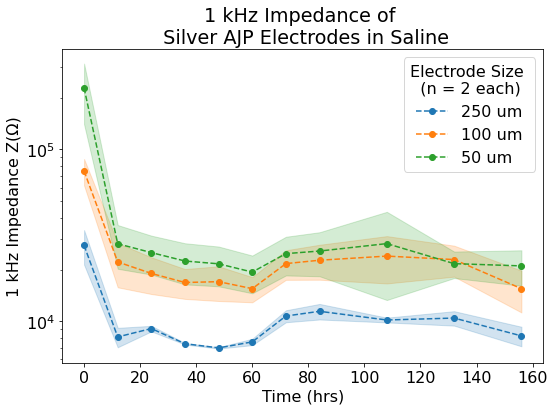

In [34]:
colors_avg = ["tab:blue",  "tab:orange",  "tab:green"]
labels = ["250 um", "100 um", "50 um"]

plt.figure(figsize=(8,6))

t = 0

# for t in range(len(time_points)):
#     plt.plot(time_points[t],global_impedances[t][0], "o", color="lightsteelblue")
#     plt.plot(time_points[t],global_impedances[t][1], "o", color="lightsteelblue")

#     plt.plot(time_points[t],global_impedances[t][2], "o", color="bisque")
#     plt.plot(time_points[t],global_impedances[t][3], "o", color="bisque")

#     plt.plot(time_points[t],global_impedances[t][4], "o", color="lightgreen")
#     plt.plot(time_points[t],global_impedances[t][5], "o", color="lightgreen")

# for i in range(3):
#     # number of electrode sizes
#     electrode_size = i
#     color = colors_avg[i]
#     plt.errorbar(time_points, data_by_electrode_size[electrode_size], yerr=std_by_electrode_size[electrode_size] ,fmt="--", color=color, capsize=5)
#     plt.plot(time_points, data_by_electrode_size[electrode_size], "o--", color=color, label=labels[i])

for i in range(3):
    # number of electrode sizes
    electrode_size = i
    color = colors_avg[i]
    lower_lim = np.array(data_by_electrode_size[electrode_size]) - np.array(std_by_electrode_size[electrode_size])
    upper_lim = np.array(data_by_electrode_size[electrode_size]) + np.array(std_by_electrode_size[electrode_size])
    plt.fill_between(time_points, lower_lim, upper_lim, color=color, alpha=0.2)
    plt.plot(time_points, data_by_electrode_size[electrode_size], "o--", color=color, label=labels[i])


plt.legend(title="Electrode Size \n  (n = 2 each)")
plt.xlabel("Time (hrs)")
plt.ylabel("1 kHz Impedance Z(Ω)")
plt.yscale('log')
plt.title("1 kHz Impedance of \n Silver AJP Electrodes in Saline")
# plt.grid()
plt.tight_layout()

# plt.savefig("silver-ajp-electrode-soak-202505-shading.png", dpi=600)

plt.show()

In [415]:
np.array(data_by_electrode_size[electrode_size]) - np.array(std_by_electrode_size[electrode_size])

array([21358.95365928,  7064.37758791,  8740.88183684,  7332.28209308,
        6944.23247503,  7269.55137571,  9875.01760397, 10249.44900696])

In [243]:
# colors_avg = ["tab:blue",  "tab:orange",  "tab:green"]
# labels = ["250 um", "100 um", "50 um"]

# plt.figure(figsize=(8,6))

# t = 0

# for t in range(len(time_points)):
#     plt.plot(time_points[t],global_impedances[t][0], "o", color="lightsteelblue")
#     plt.plot(time_points[t],global_impedances[t][1], "o", color="lightsteelblue")

#     plt.plot(time_points[t],global_impedances[t][2], "o", color="bisque")
#     plt.plot(time_points[t],global_impedances[t][3], "o", color="bisque")

#     plt.plot(time_points[t],global_impedances[t][4], "o", color="lightgreen")
#     plt.plot(time_points[t],global_impedances[t][5], "o", color="lightgreen")

# for i in range(3):
#     # number of electrode sizes
#     electrode_size = i
#     color = colors_avg[i]
#     plt.errorbar(time_points, [avg_global_impedances[0][0][electrode_size], avg_global_impedances[1][0][electrode_size], avg_global_impedances[2][0][electrode_size], avg_global_impedances[3][0][electrode_size]], yerr= [avg_global_impedances[0][1][electrode_size], avg_global_impedances[1][1][electrode_size], avg_global_impedances[2][1][electrode_size], avg_global_impedances[3][1][electrode_size]],fmt="--", color=color, capsize=5)
#     plt.plot(time_points, [avg_global_impedances[0][0][electrode_size], avg_global_impedances[1][0][electrode_size], avg_global_impedances[2][0][electrode_size],avg_global_impedances[3][0][electrode_size]], "o--", color=color, label=labels[i])

# plt.legend()
# plt.xlabel("Time (hrs)")
# plt.ylabel("1 kHz Impedance Z(Ω)")
# plt.yscale('log')
# plt.title("1 kHz Impedance of Silver AJP Electrodes in Saline")
# plt.tight_layout()

# # plt.savefig("silver-ajp-electrode-soak-202505.png", dpi=600)

# plt.show()

In [35]:
data = {'Electrode': [1,2,3,4,5,6],
        'Size [um]': [250, 250, 100, 100, 50, 50],
        '1kHz Impedance [Ohms] \n at t = 0 h': global_impedances[0],
        't = 12 h': global_impedances[1],
       't = 24 h': global_impedances[2],
       't = 36 h': global_impedances[3],
       't = 48 h': global_impedances[4],
       't = 60 h': global_impedances[5],
       't = 72 h': global_impedances[6],
       't = 84 h': global_impedances[7],
       't = 108 h': global_impedances[8],
       't = 132 h': global_impedances[9],
       't = 156 h': global_impedances[10],
       }
        # 'Difference [Ohms]': np.array(global_impedances[1]) - np.array(global_impedances[0])}
df = pd.DataFrame(data)

print(tabulate(df, headers='keys', tablefmt='psql',showindex=False))

+-------------+-------------+--------------------------+------------+------------+------------+------------+------------+------------+------------+-------------+-------------+-------------+
|   Electrode |   Size [um] |   1kHz Impedance [Ohms]  |   t = 12 h |   t = 24 h |   t = 36 h |   t = 48 h |   t = 60 h |   t = 72 h |   t = 84 h |   t = 108 h |   t = 132 h |   t = 156 h |
|             |             |               at t = 0 h |            |            |            |            |            |            |            |             |             |             |
|-------------+-------------+--------------------------+------------+------------+------------+------------+------------+------------+------------+-------------+-------------+-------------|
|           1 |         250 |                  33934.9 |    7064.38 |    8740.88 |    7332.28 |    7068    |    7269.55 |    9875.02 |    10249.4 |    10504.1  |     9439.75 |     7157.28 |
|           2 |         250 |                  213

In [51]:
time_points

[0, 12, 24, 36, 48, 60, 72, 84, 108, 132, 156]

In [54]:
electrode_mean = np.mean(global_impedances, axis=1)

data = {'Time (hours)': time_points,
        'Electrode 1 (250 um)': [x[0] for x in global_impedances],
       'Electrode 2 (250 um)': [x[1] for x in global_impedances],
       'Electrode 3 (100 um)': [x[2] for x in global_impedances],
       'Electrode 4 (100 um)': [x[3] for x in global_impedances],
       'Electrode 5 (50 um)': [x[4] for x in global_impedances],
       'Electrode 6 (50 um)': [x[5] for x in global_impedances],
       }
        # 'Difference [Ohms]': np.array(global_impedances[1]) - np.array(global_impedances[0])}
df = pd.DataFrame(data)

print(tabulate(df, headers='keys', tablefmt='psql',showindex=False))

print("Time points means = ", np.mean([x[0] for x in global_impedances]))


+----------------+------------------------+------------------------+------------------------+------------------------+-----------------------+-----------------------+
|   Time (hours) |   Electrode 1 (250 um) |   Electrode 2 (250 um) |   Electrode 3 (100 um) |   Electrode 4 (100 um) |   Electrode 5 (50 um) |   Electrode 6 (50 um) |
|----------------+------------------------+------------------------+------------------------+------------------------+-----------------------+-----------------------|
|              0 |               33934.9  |               21359    |                87909.6 |                61763.9 |              140084   |              315432   |
|             12 |                7064.38 |                9163.26 |                28530.6 |                15768.8 |               20214.2 |               36300.6 |
|             24 |                8740.88 |                9412.18 |                23564   |                14413.6 |               18709.4 |               31495.9 

In [45]:
np.mean(global_impedances, axis=1)

array([110080.59091731,  19506.98742558,  17722.65137249,  15549.41964204,
        15205.34533019,  14141.65946388,  19052.15370418,  19909.15856457,
        20815.4381864 ,  18321.96690684,  14908.64257193])

In [275]:
formatted_data = []
for t in range(len(time_points)):
    time_x = []
    for e_size in range(3):
        time_x.append(str(round(avg_global_impedances[t][0][e_size]/1000,2)) + " ± " + str(round(avg_global_impedances[t][1][e_size]/1000,2)))
    formatted_data.append(time_x)
    
formatted_data

[['27.65 ± 6.29', '74.84 ± 13.07', '227.76 ± 87.67'],
 ['8.11 ± 1.05', '22.15 ± 6.38', '28.26 ± 8.04'],
 ['9.08 ± 0.34', '18.99 ± 4.58', '25.1 ± 6.39'],
 ['7.41 ± 0.08', '16.82 ± 3.32', '22.42 ± 6.02'],
 ['7.01 ± 0.06', '17.01 ± 3.88', '21.6 ± 5.62'],
 ['7.59 ± 0.32', '15.49 ± 2.59', '19.34 ± 4.78']]

In [311]:
data = {'Electrode Size [um] \n (n = 2)': [50, 100, 250],
        '1 kHz Impedance [kOhms] \n at t = 0 h': formatted_data[0],
        't = 12 h': formatted_data[1],
        't = 24 h': formatted_data[2],
        't = 36 h': formatted_data[3],
        't = 48 h': formatted_data[4],
        't = 60 h': formatted_data[5],}
        # 'Difference [Ohms]': np.array(global_impedances[1]) - np.array(global_impedances[0])}
df = pd.DataFrame(data)

print(tabulate(df, headers='keys', tablefmt='psql',showindex=False))

+------------------------+----------------------------+--------------+--------------+--------------+--------------+--------------+
|   Electrode Size [um]  | 1 kHz Impedance [kOhms]    | t = 12 h     | t = 24 h     | t = 36 h     | t = 48 h     | t = 60 h     |
|                (n = 2) |  at t = 0 h                |              |              |              |              |              |
|------------------------+----------------------------+--------------+--------------+--------------+--------------+--------------|
|                     50 | 27.65 ± 6.29               | 8.11 ± 1.05  | 9.08 ± 0.34  | 7.41 ± 0.08  | 7.01 ± 0.06  | 7.59 ± 0.32  |
|                    100 | 74.84 ± 13.07              | 22.15 ± 6.38 | 18.99 ± 4.58 | 16.82 ± 3.32 | 17.01 ± 3.88 | 15.49 ± 2.59 |
|                    250 | 227.76 ± 87.67             | 28.26 ± 8.04 | 25.1 ± 6.39  | 22.42 ± 6.02 | 21.6 ± 5.62  | 19.34 ± 4.78 |
+------------------------+----------------------------+--------------+-------------

In [312]:
df_styled = df.style.background_gradient() #adding a gradient based on values in cell

df_styled

,Electrode Size [um] (n = 2),1 kHz Impedance [kOhms] at t = 0 h,t = 12 h,t = 24 h,t = 36 h,t = 48 h,t = 60 h
0,50,27.65 ± 6.29,8.11 ± 1.05,9.08 ± 0.34,7.41 ± 0.08,7.01 ± 0.06,7.59 ± 0.32
1,100,74.84 ± 13.07,22.15 ± 6.38,18.99 ± 4.58,16.82 ± 3.32,17.01 ± 3.88,15.49 ± 2.59
2,250,227.76 ± 87.67,28.26 ± 8.04,25.1 ± 6.39,22.42 ± 6.02,21.6 ± 5.62,19.34 ± 4.78


In [163]:
np.array(global_impedances[1]) - np.array(global_impedances[0])

array([ -26870.54014405,  -12195.69068356,  -59378.93928817,
        -45995.09503507, -119870.05706212, -279131.2987374 ])

4


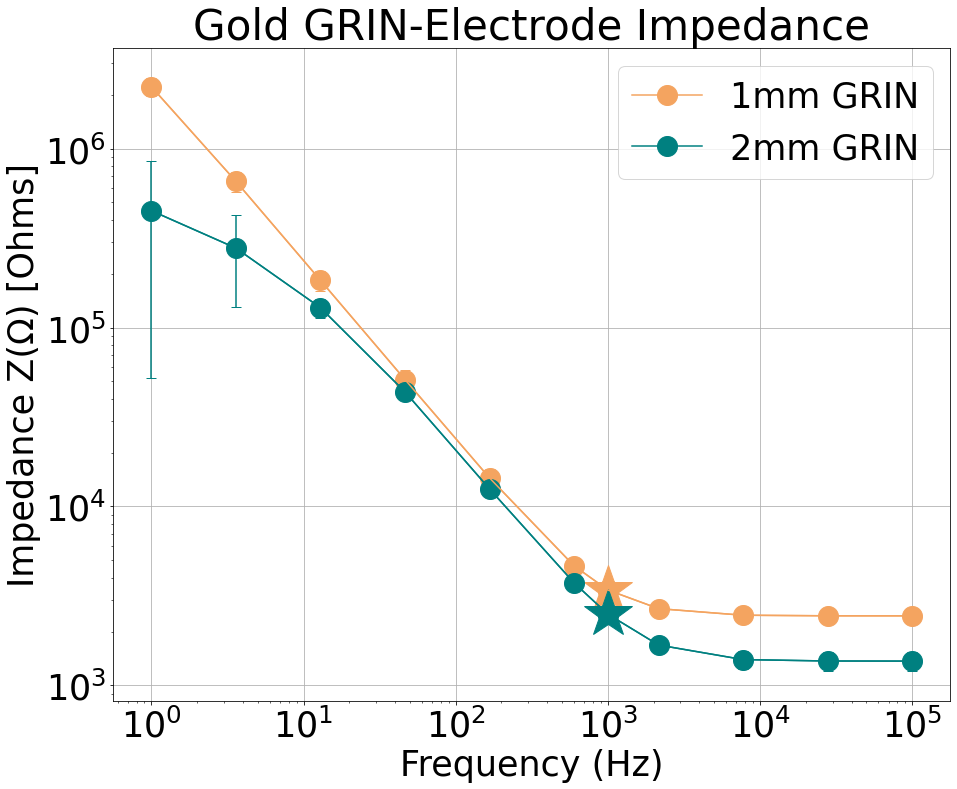

In [7]:
# Averaging data
plt.figure(figsize=(15,12))
plt.rcParams.update({'font.size': 35})

# Gold 1mm probe

color = "sandybrown"
vals = []
for i in [4,5,6,7,8,9,10]:
    vals.append(make_excel_array(gold_files[i]))

avg = np.mean(vals,axis=0)
std = np.std(vals,axis=0)

np.shape(vals)
plt.plot(avg[0], avg[1],marker='o', color=color, label="1mm GRIN",markersize=20)
plt.errorbar(avg[0], avg[1], std[1],color=color, capsize=5)
plt.plot(1000, avg[1][np.where(avg[0] == 1000)[0][0]], marker="*", color=color, markersize=50)


# Gold 2mm probe
color = "teal"
vals = []
for i in range(4):
    vals.append(make_excel_array(gold_files[i]))

avg = np.mean(vals,axis=0)
std = np.std(vals,axis=0)

np.shape(vals)
plt.plot(avg[0], avg[1],marker='o', color=color, label="2mm GRIN",markersize=20)
plt.errorbar(avg[0], avg[1], std[1],color=color, capsize=5)
print(np.where(avg[0] == 1000)[0][0])
plt.plot(1000, avg[1][np.where(avg[0] == 1000)[0][0]], marker="*", color=color, markersize=50)


plt.yscale('log')
plt.xscale('log')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Impedance Z(Ω) [Ohms]")
plt.title("Gold GRIN-Electrode Impedance")
plt.legend()
plt.grid()
plt.show()

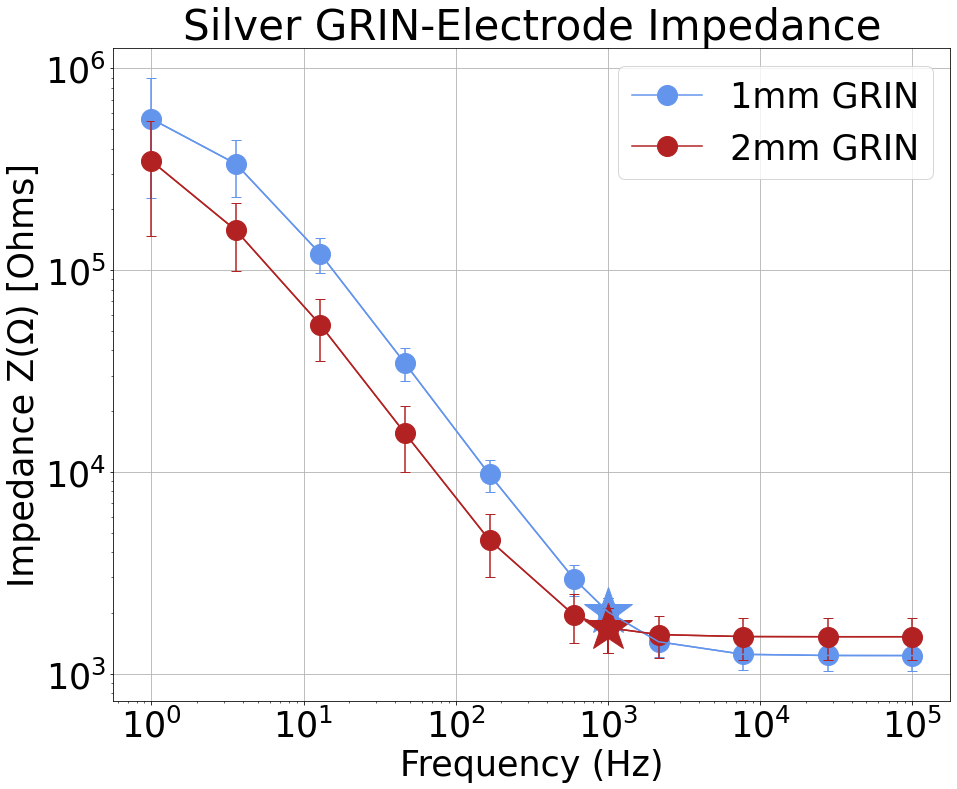

In [8]:
# Averaging data
plt.figure(figsize=(15,12))
plt.rcParams.update({'font.size': 35})
    
# Silver 1mm probe
color = "cornflowerblue"
vals = []
for i in [9,10,11,12,13,14,15]:
    vals.append(make_excel_array(silver_files[i]))

avg = np.mean(vals,axis=0)
std = np.std(vals,axis=0)

np.shape(vals)
plt.plot(avg[0], avg[1],marker='o', color=color, label="1mm GRIN",markersize=20)
plt.errorbar(avg[0], avg[1], std[1],color=color, capsize=5)
plt.plot(1000, avg[1][np.where(avg[0] == 1000)[0][0]], marker="*", color=color, markersize=50)


# # Silver 2mm probe
color = "firebrick"
vals = []
for i in range(8):
    vals.append(make_excel_array(silver_files[i]))

avg = np.mean(vals,axis=0)
std = np.std(vals,axis=0)

np.shape(vals)
plt.plot(avg[0], avg[1],marker='o', color=color, label="2mm GRIN",markersize=20)
plt.errorbar(avg[0], avg[1], std[1],color=color, capsize=5)
plt.plot(1000, avg[1][np.where(avg[0] == 1000)[0][0]], marker="*", color=color, markersize=50)

    
    
plt.yscale('log')
plt.xscale('log')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Impedance Z(Ω) [Ohms]")
plt.title("Silver GRIN-Electrode Impedance")
plt.legend()
plt.grid()
plt.show()

## JOINT FIGURE

In [9]:
std[1][4]

422.54814828129327

gold 1mm impedance
1000.0
3411.8993374042134
322.8327526824382
n= 7
4
gold 2mm impedance
1000.0
2500.510293478705
40.901757729615035
silver 1mm impedance
1000.0
2025.7104550383872
340.22523558848803
silver 2mm impedance
1000.0
1690.7488124276904
422.54814828129327


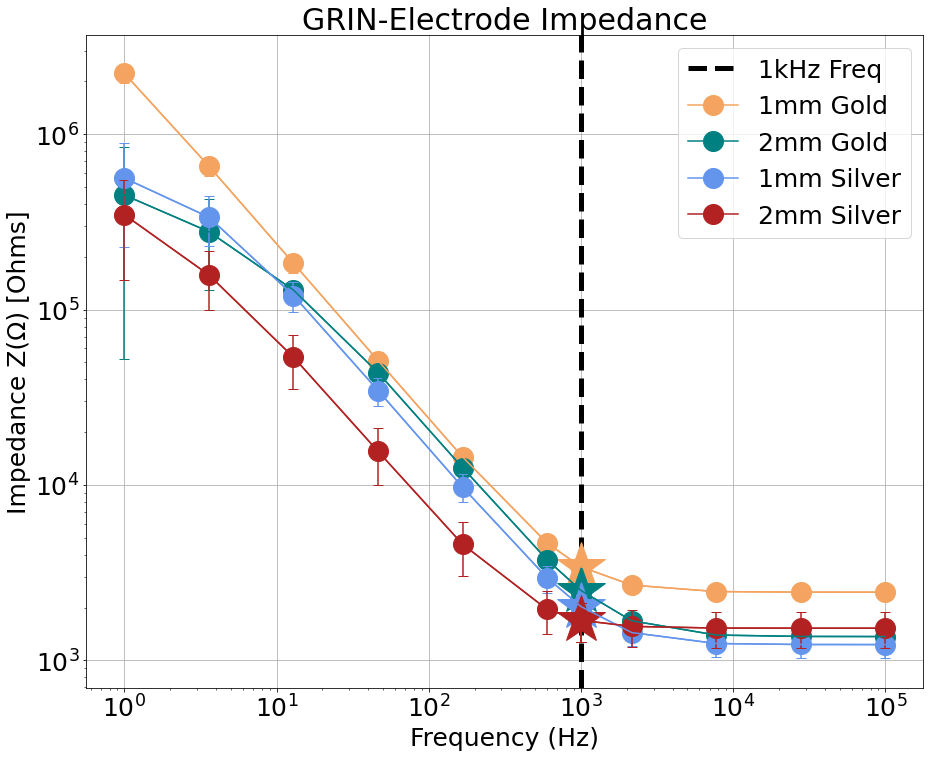

In [10]:
# Averaging data
plt.figure(figsize=(15,12))
plt.rcParams.update({'font.size': 25})

plt.axvline(x=1000, linestyle='dashed', color="black", linewidth=5, label="1kHz Freq")

# Gold 1mm probe

color = "sandybrown"
vals = []
for i in [4,5,6,7,8,9,10]:
    vals.append(make_excel_array(gold_files[i]))

avg = np.mean(vals,axis=0)
std = np.std(vals,axis=0)

np.shape(vals)
plt.plot(avg[0], avg[1],marker='o', color=color, label="1mm Gold",markersize=20)
plt.errorbar(avg[0], avg[1], std[1],color=color, capsize=5)
plt.plot(1000, avg[1][np.where(avg[0] == 1000)[0][0]], marker="*", color=color, markersize=50)

print("gold 1mm impedance")
print(avg[0][4])
print(avg[1][4])
print(std[1][4])
print("n=", len([4,5,6,7,8,9,10]))


# Gold 2mm probe
color = "teal"
vals = []
for i in range(4):
    vals.append(make_excel_array(gold_files[i]))

avg = np.mean(vals,axis=0)
std = np.std(vals,axis=0)

np.shape(vals)
plt.plot(avg[0], avg[1],marker='o', color=color, label="2mm Gold",markersize=20)
plt.errorbar(avg[0], avg[1], std[1],color=color, capsize=5)
print(np.where(avg[0] == 1000)[0][0])
plt.plot(1000, avg[1][np.where(avg[0] == 1000)[0][0]], marker="*", color=color, markersize=50)

print("gold 2mm impedance")
print(avg[0][4])
print(avg[1][4])
print(std[1][4])

    
# Silver 1mm probe
color = "cornflowerblue"
vals = []
for i in [9,10,11,12,13,14,15]:
    vals.append(make_excel_array(silver_files[i]))

avg = np.mean(vals,axis=0)
std = np.std(vals,axis=0)

np.shape(vals)
plt.plot(avg[0], avg[1],marker='o', color=color, label="1mm Silver",markersize=20)
plt.errorbar(avg[0], avg[1], std[1],color=color, capsize=5)
plt.plot(1000, avg[1][np.where(avg[0] == 1000)[0][0]], marker="*", color=color, markersize=50)

print("silver 1mm impedance")
print(avg[0][4])
print(avg[1][4])
print(std[1][4])

# # Silver 2mm probe
color = "firebrick"
vals = []
for i in range(8):
    vals.append(make_excel_array(silver_files[i]))

avg = np.mean(vals,axis=0)
std = np.std(vals,axis=0)

np.shape(vals)
plt.plot(avg[0], avg[1],marker='o', color=color, label="2mm Silver",markersize=20)
plt.errorbar(avg[0], avg[1], std[1],color=color, capsize=5)
plt.plot(1000, avg[1][np.where(avg[0] == 1000)[0][0]], marker="*", color=color, markersize=50)

print("silver 2mm impedance")
print(avg[0][4])
print(avg[1][4])
print(std[1][4])

plt.yscale('log')
plt.xscale('log')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Impedance Z(Ω) [Ohms]")
plt.title("GRIN-Electrode Impedance")
plt.legend()
plt.grid()
plt.show()

gold 1mm impedance
1000.0
3411.8993374042134
322.8327526824382
n= 7
4
gold 2mm impedance
1000.0
2500.510293478705
40.901757729615035
silver 1mm impedance
1000.0
2025.7104550383872
340.22523558848803
silver 2mm impedance
1000.0
1690.7488124276904
422.54814828129327


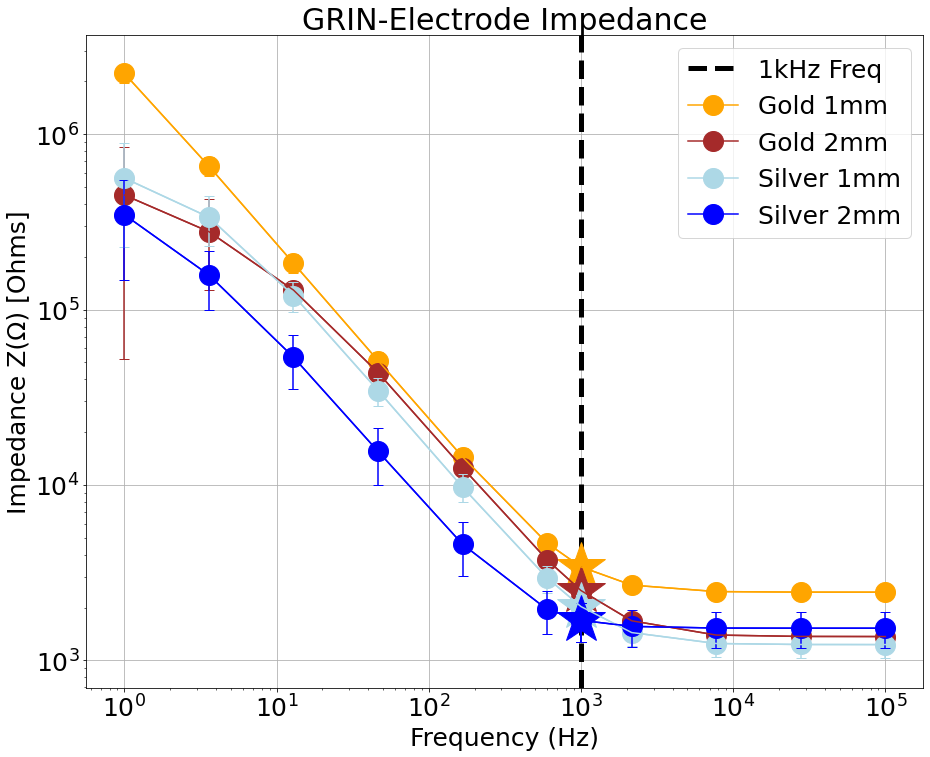

In [11]:
# Averaging data
plt.figure(figsize=(15,12))
plt.rcParams.update({'font.size': 25})

plt.axvline(x=1000, linestyle='dashed', color="black", linewidth=5, label="1kHz Freq")

# Gold 1mm probe

color = "orange"
vals = []
for i in [4,5,6,7,8,9,10]:
    vals.append(make_excel_array(gold_files[i]))

avg = np.mean(vals,axis=0)
std = np.std(vals,axis=0)

np.shape(vals)
plt.plot(avg[0], avg[1],marker='o', color=color, label="Gold 1mm",markersize=20)
plt.errorbar(avg[0], avg[1], std[1],color=color, capsize=5)
plt.plot(1000, avg[1][np.where(avg[0] == 1000)[0][0]], marker="*", color=color, markersize=50)

print("gold 1mm impedance")
print(avg[0][4])
print(avg[1][4])
print(std[1][4])
print("n=", len([4,5,6,7,8,9,10]))


# Gold 2mm probe
color = "brown"
vals = []
for i in range(4):
    vals.append(make_excel_array(gold_files[i]))

avg = np.mean(vals,axis=0)
std = np.std(vals,axis=0)

np.shape(vals)
plt.plot(avg[0], avg[1],marker='o', color=color, label="Gold 2mm",markersize=20)
plt.errorbar(avg[0], avg[1], std[1],color=color, capsize=5)
print(np.where(avg[0] == 1000)[0][0])
plt.plot(1000, avg[1][np.where(avg[0] == 1000)[0][0]], marker="*", color=color, markersize=50)

print("gold 2mm impedance")
print(avg[0][4])
print(avg[1][4])
print(std[1][4])

    
# Silver 1mm probe
color = "lightblue"
vals = []
for i in [9,10,11,12,13,14,15]:
    vals.append(make_excel_array(silver_files[i]))

avg = np.mean(vals,axis=0)
std = np.std(vals,axis=0)

np.shape(vals)
plt.plot(avg[0], avg[1],marker='o', color=color, label="Silver 1mm",markersize=20)
plt.errorbar(avg[0], avg[1], std[1],color=color, capsize=5)
plt.plot(1000, avg[1][np.where(avg[0] == 1000)[0][0]], marker="*", color=color, markersize=50)

print("silver 1mm impedance")
print(avg[0][4])
print(avg[1][4])
print(std[1][4])

# # Silver 2mm probe
color = "blue"
vals = []
for i in range(8):
    vals.append(make_excel_array(silver_files[i]))

avg = np.mean(vals,axis=0)
std = np.std(vals,axis=0)

np.shape(vals)
plt.plot(avg[0], avg[1],marker='o', color=color, label="Silver 2mm",markersize=20)
plt.errorbar(avg[0], avg[1], std[1],color=color, capsize=5)
plt.plot(1000, avg[1][np.where(avg[0] == 1000)[0][0]], marker="*", color=color, markersize=50)

print("silver 2mm impedance")
print(avg[0][4])
print(avg[1][4])
print(std[1][4])

plt.yscale('log')
plt.xscale('log')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Impedance Z(Ω) [Ohms]")
plt.title("GRIN-Electrode Impedance")
plt.legend()
plt.grid()
plt.show()

In [12]:
## Plotting Various files at once

plot_electrodes(files[0:4])
format_log_plot()

NameError: name 'files' is not defined

In [ ]:
## Electrode numbers that I care about

silver_fn_2mm = np.array(["probe-3-electrode-1", "probe-3-electrode-3", "probe-3-electrode-5", "probe-3-electrode-7"])
silver_fn_1mm = np.array(["probe-4-electrode-1", "probe-4-electrode-2", "probe-4-electrode-3", "probe-4-electrode-4"])

gold_fn_2mm = np.array(["probe-1-electrode-6", "probe-1-electrode-7"])
gold_fn_1mm = np.array(["probe-2-electrode-1", "probe-2-electrode-2", "probe-2-electrode-3"])


# Silver

# probe-3-electrode-1
# probe-3-electrode-3
# probe-3-electrode-5
# probe-3-electrode-7

# probe-4-electrode-1
# probe-4-electrode-2
# probe-4-electrode-3
# probe-4-electrode-4

# Gold
# probe-1-electrode-6
# probe-1-electrode-7

# probe-2-electrode-1
# probe-2-electrode-2
# probe-2-electrode-3

In [ ]:
def average_impedance_data(a, color="blue", label=""):
    # input is data

    unique = np.unique(a[0])
    averaged = np.zeros((3,len(unique)))

    for i in range(len(unique)):
        averaged[0][i] = unique[i]
        averaged[1][i] = np.mean(a[1][np.where(a[0] == unique[i])])
        averaged[2][i] = np.std(a[1][np.where(a[0] == unique[i])])
    
    plt.errorbar(averaged[0], averaged[1], averaged[2], ecolor="red")
    plt.plot(averaged[0], averaged[1], marker="o", c=color, label=label,markersize=20)
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Impedance Z(Ω) [Ohms]")

    return averaged

In [ ]:
gold_data_E6 = np.concatenate(make_excel_array(gold_files[0]), make_excel_array(gold_files[1])) 
# gold_data_E7 = make_excel_array(gold_files[0]), 

# average_impedance_data([x,y])

In [ ]:
# polyimide = make_excel_array(files[0])
# print(np.shape(polyimide))

# silver_1 = make_excel_array(files[3])
# silver_2 = make_excel_array(files[11])
                            
# silver = []
# silver.append(np.append(silver_1[0], silver_2[0]))
# silver.append(np.append(silver_1[1], silver_2[1]))
# print(np.shape(silver))

# gold_1 = make_excel_array(files[5])
# gold_2 = make_excel_array(files[7])
# gold_3 = make_excel_array(files[9])

# gold = []
# gold.append(np.append(gold_1[0], [gold_2[0], gold_3[0]]))
# gold.append(np.append(gold_1[1], [gold_2[1], gold_3[1]]))
# print(np.shape(gold))

In [ ]:
plt.figure(figsize=(15,12))
plt.rcParams.update({'font.size': 35})

avg_polyimide = average_impedance_data(polyimide, "red", "Polyimide")
avg_silver = average_impedance_data(silver, "Blue", "Silver")
avg_gold = average_impedance_data(gold, "Gold", "Gold")

plt.yscale('log')
plt.xscale('log')
plt.xlabel("Sampling Frequency (Hz)")
plt.ylabel("Impedance Z(Ω) [Ohms]")
plt.grid()
plt.legend()

# PLOT STARS
plt.axvline(x=1000, linestyle='dashed', color="green", linewidth=10, label="1kHz")

plt.plot(1000, avg_polyimide[1][np.where(avg_polyimide[0] == 1000)], marker="*", color="red", markersize=50)
plt.plot(1000, avg_silver[1][np.where(avg_silver[0] == 1000)], marker="*", color="blue", markersize=50)
plt.plot(1000, avg_gold[1][np.where(avg_gold[0] == 1000)], marker="*", color="gold", markersize=50)



In [ ]:
print(1000, avg_polyimide[1][np.where(avg_polyimide[0] == 1000)])
print(1000, avg_silver[1][np.where(avg_silver[0] == 1000)])
print(1000, avg_gold[1][np.where(avg_gold[0] == 1000)])

m = avg_polyimide[1][np.where(avg_polyimide[0] == 1000)]
sd = avg_polyimide[2][np.where(avg_polyimide[0] == 1000)]

print("Polyimide")
print('%0.1f' % m + " ± " + '%0.1f' % sd + "Ω")

m = avg_silver[1][np.where(avg_silver[0] == 1000)]
sd = avg_silver[2][np.where(avg_silver[0] == 1000)]
print("Silver")
print('%0.1f' % m + " ± " + '%0.1f' % sd + "Ω")


m = avg_gold[1][np.where(avg_gold[0] == 1000)]
sd = avg_gold[2][np.where(avg_gold[0] == 1000)]
print("Gold")
print('%0.1f' % m + " ± " + '%0.1f' % sd + "Ω")


In [ ]:
avg_polyimide[1][np.where(avg_polyimide[0] == 1000)]

# Plot ALL electrodes at once

In [ ]:
# # Plot ALL electrodes at once

# files = get_files()

# plt.figure(figsize=(15,8))
# plot_sample(files, 'electrode1-', color='bo-', label="Electrode 1")
# plot_sample(files, 'electrode2-', color='ro-', label="Electrode 2")
# plot_sample(files, 'electrode3-', color='go-', label="Electrode 3")
# plot_sample(files, 'electrode4-', color='co-', label="Electrode 4")
# plot_sample(files, 'electrode5-', color='mo-', label="Electrode 5")
# plot_sample(files, 'electrode6-', color='yo-', label="Electrode 6")

# plt.title("Impedance (Z) of all electrodes at varying depths")
# plt.xlabel("Frequency (Hz)")
# plt.ylabel("Impedance Z(Ω) [Ohms]")
# plt.legend()
# format_log_plot()

# # plt.savefig('Z-sweep-all-electrodes.png')
# plt.show()


# Look at data across a single electrode

In [ ]:

    
# def plot_freq_z_phase_single_sample(fname,title=""):
#     vals = make_excel_array(fname)
#     plt.subplot(1,2,1)
#     plt.plot(vals[0], vals[1],'o-')
#     plt.yscale('log')
#     plt.xscale('log')
#     plt.xlabel("Frequency (Hz)")
#     plt.ylabel("Impedance Z(Ω) [Ohms]")
#     plt.title(title)
    
#     plt.subplot(1,2,2)
#     plt.plot(vals[0], vals[2],'o-')
#     plt.yscale('log')
#     plt.xscale('log')
#     plt.xlabel("Frequency (Hz)")
#     plt.ylabel("Phase (Theta)")
#     plt.title(title)
    
#     plt.show()
    
# # Plot with different y-axes
# # def plot_freq_z_phase(file_list, electrode_name, color='o', label=""):
# #     # makes a plot of relevant electrodes e.g. electrode1
# #     # specify color b, r, c, m, y, b, w
# #     label_flag = True
# #     fig, ax1 = plt.subplots()
# #     ax1.set_xlabel('Frequency (Hz)')
# #     color = 'tab:red'
# #     ax1.plot(t, data1, color=color)
# #     ax1.set_ylabel('Impedance Z(Ω) [Ohms]', color=color)
# #     ax1.tick_params(axis='y', labelcolor=color)
    
# #     ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
# #     color = 'tab:blue'
# #     ax2.plot(t, data2, color=color)
# #     ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
# #     ax2.tick_params(axis='y', labelcolor=color)
# #     fig.tight_layout()  # otherwise the right y-label is slightly clipped
# #     plt.show()

    
# def find_num_in_fname(word, qry):
#     s = word.find(qry) 
#     start = s + len(qry)
#     stop = word.find('mm')
#     if (s == -1 or stop == -1):
#         return -1
#     return int(word[start:stop])
        
# def get_electrode_data(electrode_name, file_list):
#     z_vals = []
#     freqs = []
#     depths = []
#     phase_vals = []
    
#     for fname in file_list:
#         if electrode_name in fname:
#             vals = make_excel_array(fname)
#             if len(vals[0]) == 19:
#                 z_vals.append(vals[1])
#                 phase_vals.append(vals[2])
#                 dep = find_num_in_fname(fname, electrode_name)
#                 if dep != -1:
#                     depths.append(dep)
#                 if freqs == []:
#                     freqs = vals[0]
                    
#     if (len(z_vals) != len(depths)):
#         print("Error in get_electrode_data - incongruent number of samples")
        
#     return freqs, z_vals, depths, phase_vals

# def plot_electrode_data(freqs, z_vals, depths, color='-o',title=""):
#     # makes a plot of specific electrode - no error bars
#     assert(len(z_vals) == len(depths))
#     for i in range(len(z_vals)):
#         plt.plot(freqs, z_vals[i], color, label=depths[i])
#         plt.yscale('log')
#         plt.xscale('log')
#         plt.xlabel("Frequency (Hz)")
#         plt.ylabel("Impedance Z(Ω) [Ohms]")
#         plt.title(title)
        
# def plot_electrode_data_and_phase(freqs, z_vals, phase_vals, depths, color='-o',title=""):
#     # makes a plot of specific electrode - no error bars
#     assert(len(z_vals) == len(depths))
#     z_vals_new = []
#     phase_vals_new = []
    
#     depths = np.array(depths)
#     index_sort = np.argsort(depths)
#     depths = depths[index_sort]
#     for i in index_sort:
#         z_vals_new.append(z_vals[i])
#         phase_vals_new.append(phase_vals[i])
        
#     z_vals = z_vals_new
#     phase_vals = phase_vals_new
    
#     plt.figure(figsize=(20,8))
#     plt.subplot(1,2,1)
#     for i in range(len(z_vals)):
#         plt.plot(freqs, z_vals[i], color, label=depths[i])
#         plt.yscale('log')
#         plt.xscale('log')
#         plt.xlabel("Frequency (Hz)")
#         plt.ylabel("Impedance Z(Ω) [Ohms]")
#         plt.legend(title="Electrode Depth (mm)")
#         plt.title(title)
        
    
#     plt.subplot(1,2,2)
#     for i in range(len(z_vals)):
#         plt.plot(freqs, phase_vals[i], '-x', label=depths[i])
#         plt.xscale('log')
#         plt.xlabel("Frequency (Hz)")
#         plt.ylabel("Phase (Theta)")
#         plt.title(title)
        
# #     plt.show()
   
        
# def plot_electrode_errors(freqs, z_vals, title=""):
#     plt.errorbar(freqs, np.mean(z_vals, axis=0), yerr=np.std(z_vals, axis=0))
#     plt.yscale('log')
#     plt.xscale('log')
#     plt.xlabel("Frequency (Hz)")
#     plt.ylabel("Impedance Z(Ω) [Ohms]")
#     plt.title(title)

In [ ]:
# plot_electrode_data_and_phase(freqs, z_vals, phase_vals, depths, color='-o',title=e_titles[i])

# Plot Error Bars of Each Electrode Across Frequency

In [ ]:
# # freqs, z_vals, depths = get_electrode_data("electrode1-", files)
# # plot_electrode_data(freqs, z_vals, depths, color='-o',title="Electrode 1")
# # plot_electrode_errors(freqs, z_vals, title="Electrode 1"):

# electrodes = ['electrode1-', 'electrode2-', 'electrode3-', 'electrode4-', 'electrode5-', 'electrode6-']
# e_titles = ['Electrode 1', 'Electrode 2', 'Electrode 3', 'Electrode 4', 'Electrode 5', 'Electrode 6']

# # Each Electrode Separately
# plt.figure(figsize=(20,18))
# for i in range(len(electrodes)):
#     freqs, z_vals, depths, _ = get_electrode_data(electrodes[i], files)
#     plt.subplot(3, 2, i+1)
#     plot_electrode_data(freqs, z_vals, depths, color='-o',title=e_titles[i])
# plt.suptitle("Plot of Each Electrode Z across Frequency", fontsize=20)

# # plt.savefig('z-sweep-subplots.png')

# plt.show()

In [ ]:
# # Each Electrode Error Bars
# plt.figure(figsize=(20,18))
# for i in range(len(electrodes)):
#     freqs, z_vals, depths, _ = get_electrode_data(electrodes[i], files)
#     plt.subplot(3, 2, i+1)
#     plot_electrode_errors(freqs, z_vals, title=e_titles[i])
# plt.suptitle("Plot of Mean Electrode Z across Frequency w/ Error Bars", fontsize=20)

# # plt.savefig('z-sweep-error-bars.png')

# plt.show()

# Get Z at freq = 1k for all samples to compare electrode depths

In [ ]:
# plt.figure(figsize=(20,18))
# for i in range(len(electrodes)):

#     freqs, z_vals, depths = get_electrode_data(electrodes[i], files)
#     depths = np.array(depths)

#     z_1k = np.array([i[6] for i in z_vals])
#     index_sort = np.argsort(depths)
#     depths = depths[index_sort]
#     z_1k = z_1k[index_sort]

#     assert((sorted(depths) == depths).all())
    
#     plt.subplot(3, 2, i+1)
#     plt.plot(depths, z_1k,'o-')
#     plt.title(e_titles[i])
#     plt.xlabel("Depth at measurement (mm)")
#     plt.ylabel("Impedance Z (Ohms)")

# plt.suptitle("Plot of 1k (Hz) Impedance at varying electrode depths", fontsize=20)

# # plt.savefig('1k-z-subplots.png')

# plt.show()

# Compare 1k Z mean and stdev on same plot

In [ ]:
# all_1k_z = []
# for i in range(len(electrodes)):

#     freqs, z_vals, depths = get_electrode_data(electrodes[i], files)
#     depths = np.array(depths)
#     z_1k = np.array([i[6] for i in z_vals])
#     index_sort = np.argsort(depths)
#     depths = depths[index_sort]
#     z_1k = z_1k[index_sort]
#     all_1k_z.append(z_1k)

In [ ]:
# means = np.zeros((len(all_1k_z), 1))
# stds = np.zeros((len(all_1k_z), 1))

# for i in range(len(all_1k_z)):
#     means[i] = np.mean(all_1k_z[i]) 
#     stds[i] = np.std(all_1k_z[i])
    
# means = means.flatten()/1000
# stds = stds.flatten()/1000
# plt.figure(figsize=(10,8))
# plt.bar([1,2,3,4,5,6], means, yerr=stds, capsize=10)
# plt.title("Average 1k Impedance Z (Ohms) with Error Bars")
# plt.xlabel("Electrode #")
# plt.ylabel("Impedance Z (kΩ)")

# # plt.savefig('avg-1k-z-barplot.png')
# plt.show()

In [ ]:
# plt.figure(figsize=(10,8))
# plt.bar(["1","2","3"], means[0:3], yerr=stds[0:3], color="m", capsize=10)
# plt.bar(["5","6"], means[5:6], yerr=stds[5:6], color="m", capsize=10)
# plt.title("Average 1k Impedance Z (Ohms) with Error Bars")
# plt.xlabel("Electrode #")
# plt.ylabel("Impedance Z (kΩ)")

# # plt.savefig('avg-1k-z-barplot-remove4.png')
# plt.show()


# Plot Electrode Data and Phase

In [ ]:

# electrodes = ['electrode1-', 'electrode2-', 'electrode3-', 'electrode4-', 'electrode5-', 'electrode6-']
# e_titles = ['Electrode 1', 'Electrode 2', 'Electrode 3', 'Electrode 4', 'Electrode 5', 'Electrode 6']

# # Display by Electrode
# for i in range(len(electrodes)):
#     freqs, z_vals, depths, phase_vals = get_electrode_data(electrodes[i], files)
#     plot_electrode_data_and_phase(freqs, z_vals, phase_vals, depths, color='-o',title=e_titles[i])
#     plt.savefig(electrodes[i] + 'z-phase.png')
#     plt.show()



In [ ]:
# depths=np.array(depths)
# depths[np.argsort(depths)]

gold 1mm impedance
1000.0
3411.8993374042134
322.8327526824382
n= 7
4
gold 2mm impedance
1000.0
2500.510293478705
40.901757729615035
silver 1mm impedance
1000.0
2025.7104550383872
340.22523558848803
silver 2mm impedance
1000.0
1690.7488124276904
422.54814828129327


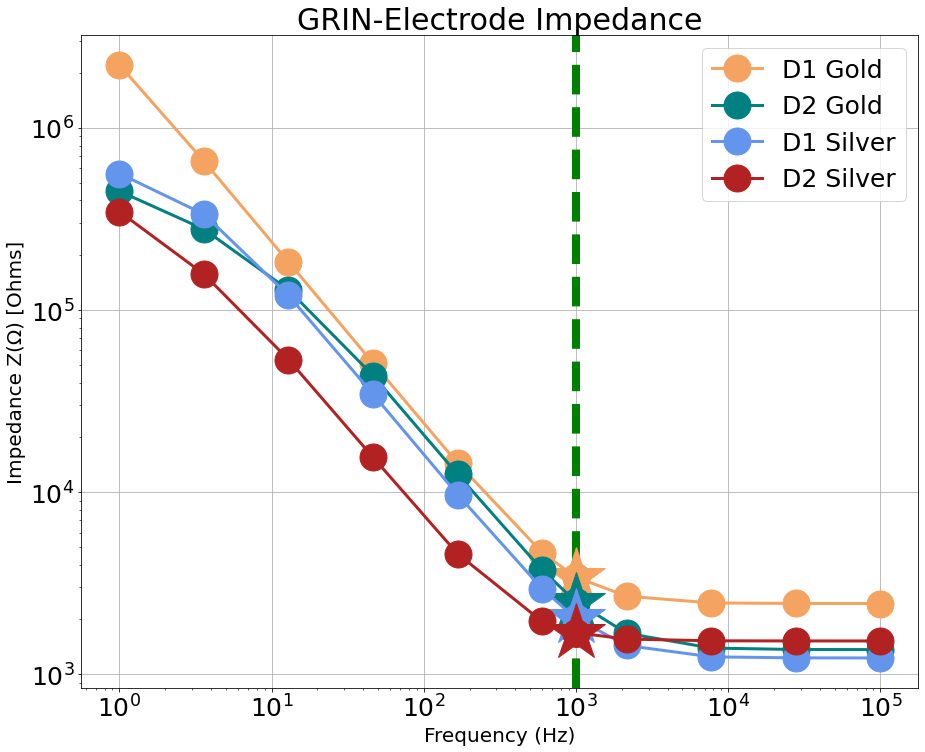

In [28]:
# Averaging data
plt.figure(figsize=(15,12))
plt.rcParams.update({'font.size': 25, 'axes.labelsize': 20})

# plt.rcParams.update({'axes.labelsize': 14, 'axes.titlesize': 16})


plt.axvline(x=1000, linestyle='dashed', color="green", linewidth=8)

# Gold 1mm probe

color = "sandybrown"
vals = []
for i in [4,5,6,7,8,9,10]:
    vals.append(make_excel_array(gold_files[i]))

avg = np.mean(vals,axis=0)
std = np.std(vals,axis=0)

lw = 3
ms = 27
star = 60


np.shape(vals)
plt.plot(avg[0], avg[1],marker='o', color=color, label="D1 Gold",markersize=ms,linewidth=lw)
# plt.errorbar(avg[0], avg[1], std[1],color=color, capsize=5)
plt.plot(1000, avg[1][np.where(avg[0] == 1000)[0][0]], marker="*", color=color, markersize=star)

print("gold 1mm impedance")
print(avg[0][4])
print(avg[1][4])
print(std[1][4])
print("n=", len([4,5,6,7,8,9,10]))


# Gold 2mm probe
color = "teal"
vals = []
for i in range(4):
    vals.append(make_excel_array(gold_files[i]))

avg = np.mean(vals,axis=0)
std = np.std(vals,axis=0)

np.shape(vals)
plt.plot(avg[0], avg[1],marker='o', color=color, label="D2 Gold",markersize=ms, linewidth=lw)
# plt.errorbar(avg[0], avg[1], std[1],color=color, capsize=5)
print(np.where(avg[0] == 1000)[0][0])
plt.plot(1000, avg[1][np.where(avg[0] == 1000)[0][0]], marker="*", color=color, markersize=star)

print("gold 2mm impedance")
print(avg[0][4])
print(avg[1][4])
print(std[1][4])

    
# Silver 1mm probe
color = "cornflowerblue"
vals = []
for i in [9,10,11,12,13,14,15]:
    vals.append(make_excel_array(silver_files[i]))

avg = np.mean(vals,axis=0)
std = np.std(vals,axis=0)

np.shape(vals)
plt.plot(avg[0], avg[1],marker='o', color=color, label="D1 Silver",markersize=ms, linewidth=lw)
# plt.errorbar(avg[0], avg[1], std[1],color=color, capsize=5)
plt.plot(1000, avg[1][np.where(avg[0] == 1000)[0][0]], marker="*", color=color, markersize=star)

print("silver 1mm impedance")
print(avg[0][4])
print(avg[1][4])
print(std[1][4])

# # Silver 2mm probe
color = "firebrick"
vals = []
for i in range(8):
    vals.append(make_excel_array(silver_files[i]))

avg = np.mean(vals,axis=0)
std = np.std(vals,axis=0)

np.shape(vals)
plt.plot(avg[0], avg[1],marker='o', color=color, label="D2 Silver",markersize=ms, linewidth=lw)
# plt.errorbar(avg[0], avg[1], std[1],color=color, capsize=5)
plt.plot(1000, avg[1][np.where(avg[0] == 1000)[0][0]], marker="*", color=color, markersize=star)

print("silver 2mm impedance")
print(avg[0][4])
print(avg[1][4])
print(std[1][4])

plt.yscale('log')
plt.xscale('log')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Impedance Z(Ω) [Ohms]")
plt.title("GRIN-Electrode Impedance")
plt.legend()
plt.grid()


plt.savefig("compare-grin-planar-impedance", dpi=300)


plt.show()

colors = ["sandybrown", "teal", "cornflowerblue", "firebrick"]